In [1]:
import pandas as pd

# 定义年份变量
year = 2022

# 构建文件路径和文件名
file_path1 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/first_table.xlsx'
file_path2 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/second_table.xlsx'
file_path3 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/merged_table.xlsx'
file_path4 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/PRODY.xlsx'
file_path5 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/EXPY.xlsx'
file_path6 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/EXPY2.xlsx'

file_path_01 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/TradeData1.xlsx'
file_path_02 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/TradeData2.xlsx'
file_path_03 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/TradeData3.xlsx'
file_path_04 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/TradeData4.xlsx'
file_path_05 = f'E:/毕业论文&最后一学期/毕业论文文稿文档/{year}China/TradeData5.xlsx'

# 读取表格数据
table_01 = pd.read_excel(file_path_01)
table_02 = pd.read_excel(file_path_02)
table_03 = pd.read_excel(file_path_03)
table_04 = pd.read_excel(file_path_04)
table_05 = pd.read_excel(file_path_05)


# 选择指定的列
selected_columns = ['ReporterISO', 'ReporterDesc', 'CmdCode', 'CmdDesc', 'Fobvalue']

# 从每个表中选择指定的列
selected_table_01 = table_01[selected_columns]
selected_table_02 = table_02[selected_columns]
selected_table_03 = table_03[selected_columns]
selected_table_04 = table_04[selected_columns]
selected_table_05 = table_05[selected_columns]

# 将选定的表格连接起来
original_table = pd.concat([selected_table_01, selected_table_02, selected_table_03, selected_table_04, selected_table_05])

# 保存到 Excel 文件
original_table.to_excel(file_path1, index=False)

print("合并完成")


合并完成


In [2]:
import pandas as pd

# 读取两个Excel文件为DataFrame
table1 = pd.read_excel(file_path1)
table2 = pd.read_excel(file_path2)

# 使用merge函数按照ReporterDesc和Country or Area列进行合并
merged_table = pd.merge(table1, table2, on='ReporterISO')

# 选择需要保留的列
merged_table = merged_table[['ReporterISO', 'ReporterDesc', 'CmdCode','CmdDesc', 'Fobvalue', 'Value (GDP per capita, PPP $)']]

# 保存合并后的数据到新的Excel文件
merged_table.to_excel(file_path3, index=False)

print("合并完成，结果已保存到merged_table.xlsx文件中。")

合并完成，结果已保存到merged_table.xlsx文件中。


In [3]:
# 计算每个国家的总出口额
Xj = merged_table.groupby('ReporterISO')['Fobvalue'].sum().reset_index()

# 将计算结果添加到原始数据中
merged_table = pd.merge(merged_table, Xj, on='ReporterISO', suffixes=('', '_total'))

# 重命名新列
merged_table.rename(columns={'Fobvalue_total': 'Xj'}, inplace=True)

# 保存到原文件中
merged_table.to_excel(file_path3, index=False)

print("新增列 Xj 并保存到 merged_table.xlsx 文件中。")

新增列 Xj 并保存到 merged_table.xlsx 文件中。


In [4]:
# 新增列 xjk/Xj，计算 Fobvalue 与 total_export 的比例
merged_table['xjk/Xj'] = merged_table['Fobvalue'] / merged_table['Xj']

# 保存到原文件中
merged_table.to_excel(file_path3, index=False)

print("新增列 xjk/Xj 已计算并保存到 merged_table.xlsx 文件中。")

新增列 xjk/Xj 已计算并保存到 merged_table.xlsx 文件中。


In [5]:
# 计算每种商品编码的 xjk/Xj 求和
denominator = merged_table.groupby('CmdCode')['xjk/Xj'].sum().reset_index()

# 将求和结果添加到原始数据中
merged_table = pd.merge(merged_table, denominator, on='CmdCode', suffixes=('', '_sum'))

# 重命名新列
merged_table.rename(columns={'xjk/Xj_sum': 'denominator'}, inplace=True)

# 保存到原文件中
merged_table.to_excel(file_path3, index=False)

print("denominator 列已计算并添加到 merged_table.xlsx 文件中。")

denominator 列已计算并添加到 merged_table.xlsx 文件中。


In [6]:
# 创建一个新的DataFrame用于存储PRODY
PRODY = pd.DataFrame(columns=['CmdCode', 'CmdDesc', 'PRODY'])

# 按商品代码（CmdCode）分组计算加权平均的人均GDP
for code, group in merged_table.groupby('CmdCode'):
    # 计算加权平均的人均GDP
    weighted_GDP = (group['Value (GDP per capita, PPP $)'] * group['xjk/Xj'] / group['denominator']).sum()
    # 获取对应的商品描述
    cmd_desc = group['CmdDesc'].iloc[0]
    # 将结果添加到PRODY表中
    PRODY = pd.concat([PRODY, pd.DataFrame({'CmdCode': [code], 'CmdDesc': [cmd_desc], 'PRODY': [weighted_GDP]})], ignore_index=True)

# 保存到与merged_table相同的路径
PRODY.to_excel(file_path4, index=False)

print("PRODY 表已保存到 PRODY.xlsx 文件中。")

PRODY 表已保存到 PRODY.xlsx 文件中。


In [7]:
# 将PRODY表和merged_table表合并
merged_table = pd.merge(merged_table, PRODY, on='CmdCode', how='left')

# 保存合并后的数据到新的Excel文件
merged_table.to_excel(file_path3, index=False)

print("已合并PRODY至merged_table.xlsx文件中。")

已合并PRODY至merged_table.xlsx文件中。


In [8]:
# 创建一个新的DataFrame用于存储EXPY
EXPY = pd.DataFrame(columns=['ReporterISO', 'EXPY','Value (GDP per capita, PPP $)'])

# 按国家名称（ReporterDesc）分组计算加权平均的PRODY
for country, group in merged_table.groupby('ReporterISO'):
    # 计算加权平均的PRODY
    weighted_PRODY = (group['PRODY'] * group['xjk/Xj']).sum()
    value_GDPpp = group['Value (GDP per capita, PPP $)'].iloc[0]
    # 将结果添加到EXPY表中
    EXPY = pd.concat([EXPY, pd.DataFrame({'ReporterISO': [country], 'EXPY': [weighted_PRODY],'Value (GDP per capita, PPP $)':[value_GDPpp]})], ignore_index=True)

# 保存到与merged_table相同的路径
EXPY.to_excel(file_path5, index=False)

print("EXPY 表已保存到 EXPY.xlsx 文件中。")

EXPY 表已保存到 EXPY.xlsx 文件中。


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 计算ln(ppgdp)和ln(expy)
EXPY['expy,in logs'] = np.log(EXPY['EXPY'])
EXPY['ppgdp,in logs'] = np.log(EXPY['Value (GDP per capita, PPP $)'])

# 拟合一条直线
X = EXPY[['ppgdp,in logs']]
y = EXPY['expy,in logs']
model = LinearRegression()
model.fit(X, y)

# 打印拟合的直线算式
print("拟合的直线算式为：")
print("ln(EXPY) =", model.intercept_, "+", model.coef_[0], "* ln(ppgdp)")

拟合的直线算式为：
ln(EXPY) = 6.959773812153684 + 0.33667360155337483 * ln(ppgdp)


In [10]:
# 计算残差比例并保存到原始数据文件中
EXPY['residuals_percent'] = (y - model.predict(X))/model.predict(X)

# 计算残差比例并保存到原始数据文件中
EXPY['residuals'] = y - model.predict(X)


# 保存修改后的数据到原始文件中
EXPY.to_excel(file_path6, index=False)

print("已完成")

已完成


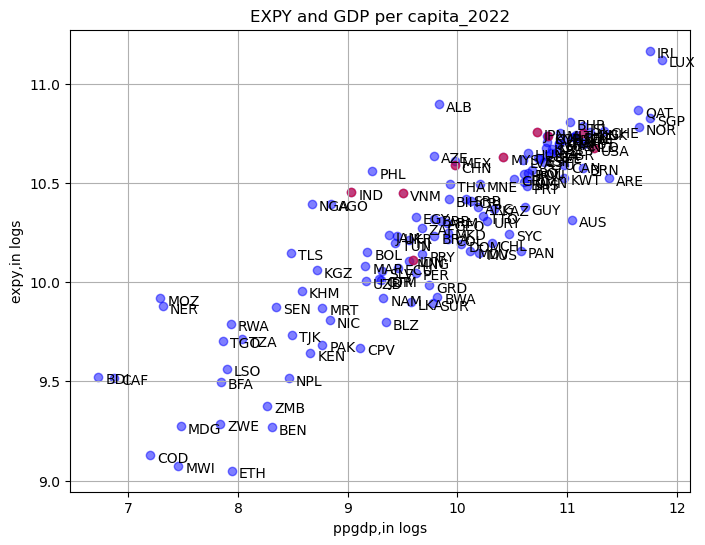

In [11]:
import matplotlib.pyplot as plt


# 创建散点图
plt.figure(figsize=(8, 6))
plt.scatter(EXPY['ppgdp,in logs'], EXPY['expy,in logs'], color='blue', alpha=0.5)
plt.title('EXPY and GDP per capita_{}'.format(year))
plt.xlabel('ppgdp,in logs')
plt.ylabel('expy,in logs')
plt.grid(True)

# 标注中国、印度、美国
countries_to_highlight = ['VNM','USA','MYS','KOR','JPN','IDN','IND','HKG','CHN']

# 在每个点旁边标注国家名称
for i, txt in enumerate(EXPY['ReporterISO']):
    plt.annotate(txt, (EXPY['ppgdp,in logs'].iloc[i], EXPY['expy,in logs'].iloc[i]), xytext=(5,-5), textcoords='offset points')

highlighted_points = EXPY[EXPY['ReporterISO'].isin(countries_to_highlight)]
plt.scatter(highlighted_points['ppgdp,in logs'], highlighted_points['expy,in logs'], color='red', alpha=0.5)

plt.show()

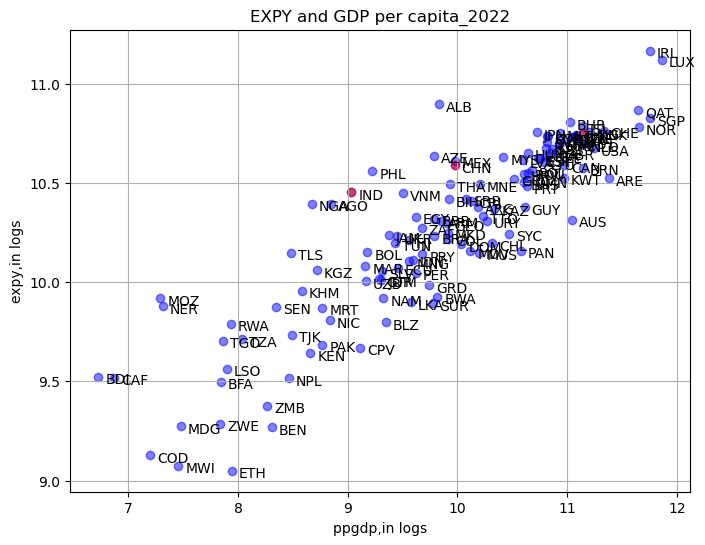

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# 创建散点图
plt.figure(figsize=(8, 6))
plt.scatter(EXPY['ppgdp,in logs'], EXPY['expy,in logs'], color='blue', alpha=0.5)
plt.title('EXPY and GDP per capita_{}'.format(year))
plt.xlabel('ppgdp,in logs')
plt.ylabel('expy,in logs')
plt.grid(True)

# 标注中国、印度、美国
countries_to_highlight = ['IND','HKG','CHN']

# 在每个点旁边标注国家名称
for i, txt in enumerate(EXPY['ReporterISO']):
    plt.annotate(txt, (EXPY['ppgdp,in logs'].iloc[i], EXPY['expy,in logs'].iloc[i]), xytext=(5,-5), textcoords='offset points')

highlighted_points = EXPY[EXPY['ReporterISO'].isin(countries_to_highlight)]
plt.scatter(highlighted_points['ppgdp,in logs'], highlighted_points['expy,in logs'], color='red', alpha=0.5)

plt.show()